<p align="center">
  <img src="https://i.ytimg.com/vi/Wm8ftqDZUVk/maxresdefault.jpg" alt="FIUBA" width="25%"/>
  </p>
  
# **Trabajo Práctico 2: Críticas Cinematográficas**
### **Grupo**: 11 - Los Pandas 🐼
### **Cuatrimestre**: 2ºC 2023
### **Corrector**: Mateo Suster
### **Integrantes**:
- ### 106861 - Labollita, Francisco
- ### 102312 - Mundani Vegega, Ezequiel
- ###  97263 - Otegui, Matías Iñaki

# Modelo Random Forest

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, make_scorer, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [3]:
reviews = pd.read_csv('train.csv')

## Se entrena un módelo posible de Random Forest

In [46]:
x_train, x_test, y_train, y_test = train_test_split(reviews['review_es'], reviews['sentimiento'], test_size=0.3, random_state=1)

In [47]:
model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(max_features='sqrt',
                                   oob_score=True,
                                   random_state=1,
                                   n_jobs=-1,
                                   min_samples_leaf=1,
                                   min_samples_split=10,
                                   criterion='entropy',
                                   n_estimators=50,
                                   ccp_alpha=0.01,
                                   max_depth=8))
])


model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

Matriz de confusión de los datos de prueba


Text(50.722222222222214, 0.5, 'True')

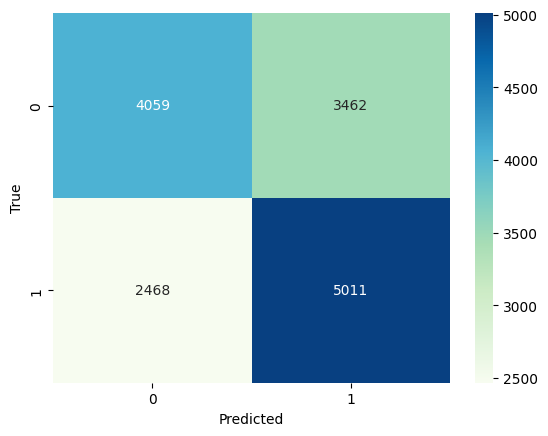

In [48]:
tabla = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión de los datos de prueba")
sns.heatmap(tabla, cmap='GnBu', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [49]:
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred, pos_label='positivo')
f1 = f1_score(y_train, y_train_pred, pos_label='positivo')
precision = precision_score(y_train, y_train_pred, pos_label='positivo')

print("Cálculo de las métricas en el conjunto de entrenamiento")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

print(classification_report(y_train, y_train_pred))

Cálculo de las métricas en el conjunto de entrenamiento
Accuracy:  0.603
Recall:  0.662
Precision:  0.592
F1 score:  0.625
              precision    recall  f1-score   support

    negativo       0.62      0.54      0.58     17479
    positivo       0.59      0.66      0.63     17521

    accuracy                           0.60     35000
   macro avg       0.60      0.60      0.60     35000
weighted avg       0.60      0.60      0.60     35000



In [50]:
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, pos_label='positivo')
precision = precision_score(y_test, y_test_pred, pos_label='positivo')
f1 = f1_score(y_test, y_test_pred, pos_label='positivo')

print("Cálculo de las métricas en el conjunto de pruebas")
print("Accuracy: "+str(round(accuracy, 3)))
print("Recall: "+str(round(recall,3)))
print("Precision: "+str(round(precision,3)))
print("F1 Score: "+str(round(f1,3)))

print(classification_report(y_test, y_test_pred))

Cálculo de las métricas en el conjunto de pruebas
Accuracy: 0.605
Recall: 0.67
Precision: 0.591
F1 Score: 0.628
              precision    recall  f1-score   support

    negativo       0.62      0.54      0.58      7521
    positivo       0.59      0.67      0.63      7479

    accuracy                           0.60     15000
   macro avg       0.61      0.60      0.60     15000
weighted avg       0.61      0.60      0.60     15000



## Se buscan los hiperparámetros con GridSearch CV

Se realizó una busqueda de los mejores parámetros con el método GridSearchCV proporcionando varios parámetros posibles basados en lo estudiado en las clases prácticas.

Se obtuvo que los mejores hiperparámetros (utilizando el F1 score como métrica) para este caso son:

- *min_samples_leaf* = $1$
- Criterio = entropy
- *min_samples_split* = 10
- *n_estimators* = 300
- *max_depth* = 12
- *ccp_alpha* = 0.001

Logrando un F1 score de 0.817, mayor en comparación al primer árbol obtenido que fue de 0.628 en el conjunto test.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(reviews['review_es'], reviews['sentimiento'], test_size=0.3, random_state=1)

In [35]:
model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(max_features='sqrt',
     oob_score=True, random_state=1, n_jobs=-1))
])

params_grid = {
    "clf__criterion": ["gini", "entropy"],
    "clf__min_samples_leaf": [1, 5],
    "clf__min_samples_split": [8, 10, 12],
    "clf__n_estimators": [100, 200, 300],
    "clf__max_depth": [8, 10, 12],
    "clf__ccp_alpha": [0.001, 0.01, 0.1]
}

scorer_fn = make_scorer(f1_score, pos_label='positivo')
kfoldcv = StratifiedKFold(n_splits=5)

gridcv = GridSearchCV(estimator=model,
                      param_grid=params_grid,
                      scoring=scorer_fn,
                      cv=kfoldcv
                      )

model = gridcv.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = f1_score(y_test, y_pred, pos_label='positivo')
print("Parámetros:", gridcv.best_params_, "\nF1 score: ", round(score, 3))

Parámetros: {'clf__ccp_alpha': 0.001, 'clf__criterion': 'entropy', 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 300} 
F1 score:  0.817


In [41]:
model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier(max_features='sqrt',
                                   oob_score=True,
                                   random_state=1,
                                   n_jobs=-1,
                                   criterion='entropy',
                                   min_samples_leaf=1,
                                   min_samples_split=10,
                                   n_estimators=300,
                                   max_depth=12,
                                   ccp_alpha=0.001))
])

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

Matriz de confusión de los datos de prueba


Text(50.722222222222214, 0.5, 'True')

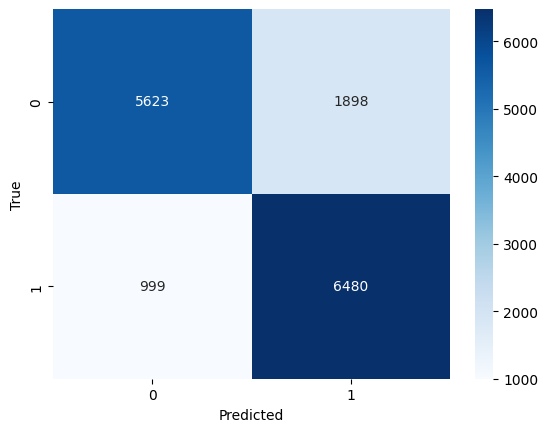

In [42]:
print("Matriz de confusión de los datos de prueba")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [43]:
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred, pos_label='positivo')
f1 = f1_score(y_train, y_train_pred, pos_label='positivo')
precision = precision_score(y_train, y_train_pred, pos_label='positivo')

print("Cálculo de las métricas en el conjunto de entrenamiento")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

print(classification_report(y_train, y_train_pred))

Cálculo de las métricas en el conjunto de entrenamiento
Accuracy:  0.814
Recall:  0.866
Precision:  0.785
F1 score:  0.824
              precision    recall  f1-score   support

    negativo       0.85      0.76      0.80     17479
    positivo       0.78      0.87      0.82     17521

    accuracy                           0.81     35000
   macro avg       0.82      0.81      0.81     35000
weighted avg       0.82      0.81      0.81     35000



In [44]:
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, pos_label='positivo')
precision = precision_score(y_test, y_test_pred, pos_label='positivo')
f1 = f1_score(y_test, y_test_pred, pos_label='positivo')

print("Cálculo de las métricas en el conjunto de pruebas")
print("Accuracy: "+str(round(accuracy, 3)))
print("Recall: "+str(round(recall, 3)))
print("Precision: "+str(round(precision, 3)))
print("F1 Score: "+str(round(f1, 3)))

print(classification_report(y_test, y_test_pred))

Cálculo de las métricas en el conjunto de pruebas
Accuracy: 0.807
Recall: 0.866
Precision: 0.773
F1 Score: 0.817
              precision    recall  f1-score   support

    negativo       0.85      0.75      0.80      7521
    positivo       0.77      0.87      0.82      7479

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



## Predicción del conjunto test

In [45]:
test_df = pd.read_csv('test.csv')

y_pred_test = model.predict(test_df['review_es'])

test_df['sentimiento'] = y_pred_test

test_df.drop("review_es", axis=1, inplace=True)
test_df.to_csv('sample_solution.csv', index=False)